<a href="https://colab.research.google.com/github/despoileralert/DSA2101-Project/blob/main/data_janitors_DSA2101_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EL
#1. Are there variations in the total passenger travel for the same period of time
# (say for a particular year) between different regions of the world?
#2. How much do holidays that are celebrated worldwide contribute to the global total travel amount for that month/year?
# eg christmas celebrated in western countries, cny celebrated in china, sg, my


#CY
#1. Which holiday has the most number of air passengers.
#2. Which countries have the highest total air passengers volumes each year?

#JN
#1. How do public holidays affect the global air travel patterns?
#2. After the outbreak of the COVID-19, how has global air travel recovered? Did the holidays contribute to this recovery process?
#3. Which months are the busiest for global travel? How is this related to the distribution of holidays?


#Ryan
#1. Do countries with more holidays have more total number of air passengers?
#2. Which type of holiday is the most influential on the total number of air passengers?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

global_holidays = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-12-24/global_holidays.csv')
monthly_passengers = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-12-24/monthly_passengers.csv')

In [4]:
global_holidays.head()
global_holidays['Date'] = pd.to_datetime(global_holidays['Date'])
global_holidays['Year'] = global_holidays['Date'].dt.year
global_holidays['Month'] = global_holidays['Date'].dt.month

global_holidays

,ADM_name,ISO3,Date,Name,Type,Year,Month
0,Aruba,ABW,2010-01-01,New Year's Day,Public holiday,2010,1
1,Aruba,ABW,2010-01-25,Betico Croes' Birthday,Public holiday,2010,1
2,Aruba,ABW,2010-02-15,Carnival Monday,Public holiday,2010,2
3,Aruba,ABW,2010-03-18,National Anthem and Flag Day,Public holiday,2010,3
4,Aruba,ABW,2010-04-02,Good Friday,Public holiday,2010,4
...,...,...,...,...,...,...,...
44388,Palestine,PSE,2015-12-24,Prophet's Birthday,Public holiday,2015,12
44389,Palestine,PSE,2016-12-12,Prophet's Birthday,Public holiday,2016,12
44390,Palestine,PSE,2017-12-01,Prophet's Birthday,Public holiday,2017,12
44391,Palestine,PSE,2018-11-21,Prophet's Birthday,Public holiday,2018,11


In [5]:
monthly_passengers.dropna(subset = ['Total_OS'], inplace = True)
global_holidays.dropna(inplace = True)
monthly_passengers.drop_duplicates(inplace = True)
global_holidays.drop_duplicates(inplace = True)

monthly_passengers


,ISO3,Year,Month,Total,Domestic,International,Total_OS
0,ALB,2010,1,NaN,NaN,NaN,117.350
1,ALB,2010,2,NaN,NaN,NaN,86.535
2,ALB,2010,3,NaN,NaN,NaN,103.795
3,ALB,2010,4,NaN,NaN,NaN,102.038
4,ALB,2010,5,NaN,NaN,NaN,109.037
...,...,...,...,...,...,...,...
7237,ZAF,2017,8,NaN,NaN,NaN,3425.617
7238,ZAF,2017,9,NaN,NaN,NaN,3454.075
7239,ZAF,2017,10,NaN,NaN,NaN,3678.780
7240,ZAF,2017,11,NaN,NaN,NaN,3482.341


First we merge the two cleaned tables together, in order to get the holiday joined on country, year and month. The Name and Type columns that were joined from the global holidays help us to identify the holidays in question.

In [10]:
df_clean = monthly_passengers.merge(global_holidays, on = ['ISO3', 'Year', 'Month'], how = 'left')
df_clean.drop(columns = ['Date', 'Name'], inplace = True)
df_clean.head()

,ISO3,Year,Month,Total,Domestic,International,Total_OS,ADM_name,Type
0,ALB,2010,1,NaN,NaN,NaN,117.350,Albania,Public holiday
1,ALB,2010,1,NaN,NaN,NaN,117.350,Albania,Public holiday
2,ALB,2010,2,NaN,NaN,NaN,86.535,Albania,Observance
3,ALB,2010,3,NaN,NaN,NaN,103.795,Albania,Observance
4,ALB,2010,3,NaN,NaN,NaN,103.795,Albania,Public holiday


In [7]:
df_clean['Type'].value_counts()

,count
Type,
Public holiday,6901
Observance,4903
Local holiday,1143
Local observance,280
Special holiday,114
Working day (replacement),79
Half-day holiday,51


Below, we group by country, year and month to obtain the number of holidays each country has per year, in every month. Then, we merge back to the monthly passengers table on the ISO3, Year and Month columns to get back the data lost while grouping. This table provides us with holiday types as well as their counts for every country per year grouped by month, in addition to the passenger statistics. Value_counts() is used as the aggregator to further separating the type column to the types of holidays that are present.

In [8]:
df_clean_valcount = df_clean.groupby(['ISO3','Year','Month'])[['Type']].value_counts().reset_index()
df_clean_valcount = df_clean_valcount.merge(monthly_passengers, on = ['ISO3', 'Year', 'Month'], how = 'inner')
df_clean_valcount

,ISO3,Year,Month,Type,count,Total,Domestic,International,Total_OS
0,ALB,2010,1,Public holiday,2,NaN,NaN,NaN,117.350
1,ALB,2010,2,Observance,1,NaN,NaN,NaN,86.535
2,ALB,2010,3,Public holiday,2,NaN,NaN,NaN,103.795
3,ALB,2010,3,Observance,1,NaN,NaN,NaN,103.795
4,ALB,2010,4,Observance,6,NaN,NaN,NaN,102.038
...,...,...,...,...,...,...,...,...,...
7178,ZAF,2017,8,Public holiday,1,NaN,NaN,NaN,3425.617
7179,ZAF,2017,9,Public holiday,2,NaN,NaN,NaN,3454.075
7180,ZAF,2017,11,Observance,1,NaN,NaN,NaN,3482.341
7181,ZAF,2017,12,Public holiday,3,NaN,NaN,NaN,3812.322


Added a date column in the dataframe so that we can more easily plot Total_OS by time.



In [ ]:
df_clean_count = df_clean.groupby(['ISO3','Year','Month'])[['Type']].count().reset_index()
df_clean_count = df_clean_count.merge(monthly_passengers, on = ['ISO3', 'Year', 'Month'], how = 'inner')
df_clean_count.rename(columns = {'Type': 'HolidayCount'}, inplace = True)
df_clean_count['Date'] = pd.to_datetime(df_clean_count['Year'].astype(str) +
                                        df_clean_count['Month'].astype(str), format='%Y%m') #https://www.marsja.se/combine-year-and-month-columns-in-pandas/
df_clean_count

,ISO3,Year,Month,HolidayCount,Total,Domestic,International,Total_OS,Date
0,AUS,2014,1,4,7992.0,4790.0,3202.0,12600.040,2014-01-01
1,AUS,2014,2,1,6697.0,4207.0,2490.0,10731.179,2014-02-01
2,AUS,2014,3,4,7277.0,4745.0,2532.0,11823.253,2014-03-01
3,AUS,2014,4,5,7467.0,4757.0,2710.0,12026.674,2014-04-01
4,AUS,2014,5,2,6977.0,4529.0,2449.0,11312.633,2014-05-01
...,...,...,...,...,...,...,...,...,...
2701,USA,2017,8,6,77563.0,66856.0,10708.0,144966.412,2017-08-01
2702,USA,2017,9,13,65316.0,57405.0,7913.0,123563.734,2017-09-01
2703,USA,2017,10,11,73143.0,64908.0,8235.0,138308.935,2017-10-01
2704,USA,2017,11,6,70018.0,62162.0,7856.0,131553.688,2017-11-01


In [ ]:
df_clean_count1 = df_clean_count.pivot(index = 'Date', columns = 'ISO3', values = 'Total')
df_clean_count1

ISO3,AUS,AUT,BEL,BGR,CHE,CHN,CYP,CZE,DEU,DNK,...,NLD,NOR,POL,PRT,ROU,SVK,SVN,SWE,THA,USA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,NaN,1616.764,1337.584,273.780,2785.005,NaN,NaN,714.916,10206.993,1537.054,...,3116.393,1935.960,1102.669,1472.232,590.930,100.151,NaN,1750.487,NaN,53043.0
2010-02-01,NaN,1594.077,1397.881,242.626,2715.644,NaN,258.954,685.925,9985.787,1609.501,...,3051.339,2028.942,1080.644,1433.205,528.116,98.600,NaN,1805.106,NaN,49091.0
2010-03-01,NaN,1908.254,1678.130,273.116,3201.375,NaN,NaN,887.087,13090.984,1979.184,...,3700.319,2398.396,1303.859,1772.630,657.611,118.586,NaN,2213.762,NaN,62735.0
2010-04-01,NaN,1624.357,1544.861,245.311,2606.965,NaN,462.592,816.449,10879.022,1466.776,...,3215.276,1734.707,1139.301,1917.346,647.471,99.046,NaN,1611.699,NaN,60145.0
2010-05-01,NaN,2080.848,2078.077,424.416,3118.248,NaN,672.133,1050.300,15144.847,2156.579,...,4449.154,2583.839,1643.950,2250.234,731.926,135.270,NaN,2424.184,NaN,61941.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-01,8197.0,2807.833,3408.657,1882.109,5247.904,50465.0,NaN,1863.455,21571.733,3191.707,...,7611.207,3675.007,4090.307,5257.066,1888.352,375.234,NaN,3637.417,11400.918,77563.0
2017-09-01,8367.0,2734.285,3202.473,1304.988,4874.610,46547.0,NaN,1732.354,21252.374,3092.281,...,7047.173,3535.065,3848.917,4880.541,1756.433,269.858,NaN,3557.400,9844.193,65316.0
2017-10-01,8754.0,2424.628,2982.388,670.632,4875.555,48831.0,1129.451,1419.400,20230.108,3030.083,...,6978.713,3507.313,3309.933,4473.343,1620.942,176.187,NaN,3423.537,9676.856,73143.0


In [ ]:
#Does holiday count contribute to total number of air passengers?
#(Yes, as holiday count increases, Total number of air passengers increases)

df3 = df_clean_count.groupby('Year')[['Total_OS','HolidayCount']].sum()
df3

,Total_OS,HolidayCount
Year,,
2010,2.558013e+06,678
2011,2.694221e+06,683
2012,2.755843e+06,686
2013,2.740579e+06,674
2014,3.195754e+06,782
2015,3.373278e+06,790
2016,3.588572e+06,799
2017,3.775399e+06,819


In [ ]:
#Did holiday count for each region increase? (China, europe , US)
#(No, holiday count for china decrease, overall increase for europe and US)

china = df_clean_count[df_clean_count['ISO3'] == 'CHN']
china = china.groupby('Year')[['HolidayCount']].sum().reset_index()
china['region'] = 'China'
china

,Year,HolidayCount,region
0,2014,55,China
1,2015,51,China
2,2016,51,China
3,2017,49,China


In [ ]:
europe_list = ['AUT', 'BEL', 'BGR', 'CHE', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST',
    'FIN', 'FRA', 'GBR', 'GRC', 'HRV', 'HUN', 'IRL', 'ISL', 'ITA', 'LTU',
    'LUX', 'LVA', 'MLT', 'NLD', 'NOR', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE']
europe = df_clean_count[df_clean_count['ISO3'].isin(europe_list)]
europe = europe.groupby('Year')[['HolidayCount']].sum().reset_index()
europe['region'] = 'Europe'
europe

,Year,HolidayCount,region
0,2010,574,Europe
1,2011,578,Europe
2,2012,580,Europe
3,2013,572,Europe
4,2014,563,Europe
5,2015,570,Europe
6,2016,576,Europe
7,2017,596,Europe


In [ ]:
usa = df_clean_count[df_clean_count['ISO3'] == 'USA']
usa = usa.groupby('Year')[['HolidayCount']].sum().reset_index()
usa['region'] = 'USA'
usa

,Year,HolidayCount,region
0,2010,104,USA
1,2011,105,USA
2,2012,106,USA
3,2013,102,USA
4,2014,107,USA
5,2015,110,USA
6,2016,111,USA
7,2017,114,USA


In [ ]:
region_data = pd.concat([china,europe,usa])
region_data.sample(5)
region_data['Year'].dtype

dtype('int64')

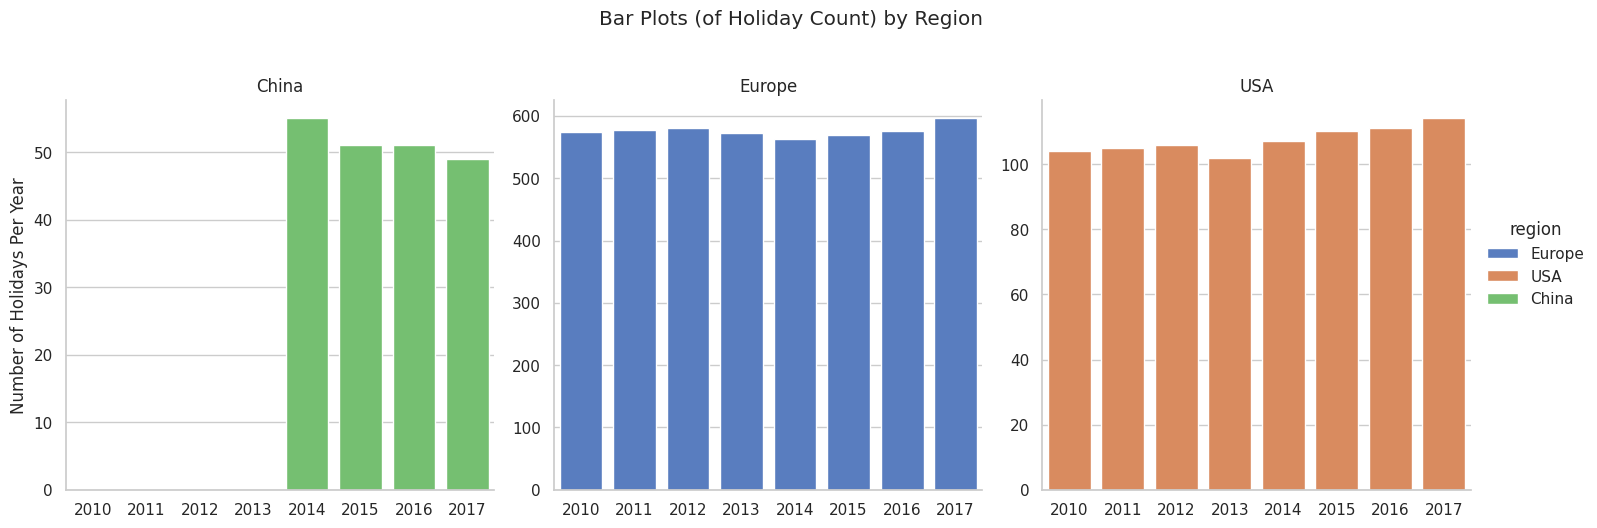

In [ ]:

#Plot 2
#(How does holiday count change among China, US and Europe?)

sns.set_theme(style="whitegrid", context="notebook", palette="muted")
g = sns.catplot(x='Year', y='HolidayCount', col='region', data=region_data, kind='bar',
                sharey = False, hue = 'region')
g.set_axis_labels("", "Number of Holidays Per Year")
g.set_titles("{col_name}")
plt.suptitle('Bar Plots (of Holiday Count) by Region', y=1.1) # Adjust title position
plt.show()

As can be seen from the small multiples bar plot above, number of holidays per year...
- Decreased for china from 2014 to 2017 by around 11%
- Marginally increased for Europe from 2010 to 2017 by around 4%
- Increase for US from 2010 to 2017 by around 10%

In [ ]:
from plotnine import *

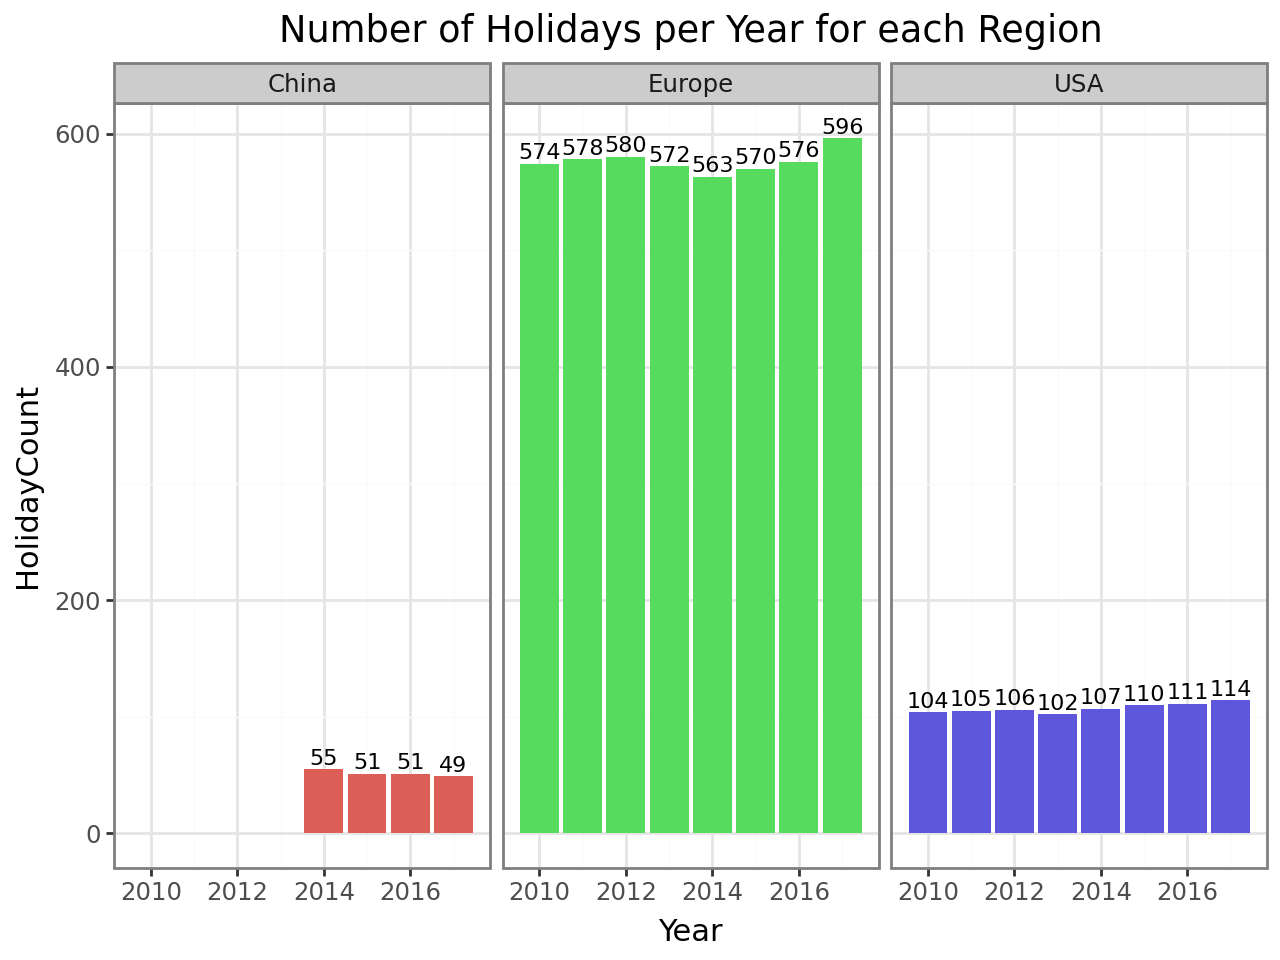

In [ ]:
(
    ggplot(region_data, aes(x='Year', y='HolidayCount', fill='region')) +
    geom_col(show_legend=False) +
    facet_wrap('~region') +
    labs(title='Number of Holidays per Year for each Region') +
    geom_text(aes(label='HolidayCount'), va='bottom', nudge_y=0.5, size=8) +
    theme(figure_size=(15, 8)) +
    theme_bw()
)